<a href="https://colab.research.google.com/github/mohadesehsotoudehnia/FIS-projects/blob/main/MiniProject3%20/%20MP3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 5

In [ ]:
# Install gdown
!pip install gdown

# Google Drive file URL
url = 'https://drive.google.com/uc?id=1ncDanHwfSBnhDzruKZiayxyGIprguJVf'

# Download the file using gdown
!gdown {url}

# Check if the file is downloaded
import os
os.listdir()  # List files in the current directory


Downloading...
From: https://drive.google.com/uc?id=1ncDanHwfSBnhDzruKZiayxyGIprguJVf
To: /content/train.csv
100% 61.2k/61.2k [00:00<00:00, 28.6MB/s]


['.config', 'train.csv', 'sample_data']

In [ ]:
import pandas as pd

# Load the Titanic dataset
df = pd.read_csv('/content/train.csv')

# Show the first few rows of the dataset
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Fill missing values in the 'Age' column with the median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill missing values in the 'Fare' column with the mean
df['Fare'].fillna(df['Fare'].mean(), inplace=True)

# Fill missing values in the 'Embarked' column with the mode (most frequent value)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Display the first 5 rows to ensure the missing values are filled
df.head()


/tmp/ipython-input-24244967.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-24244967.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Drop the columns 'Name', 'Ticket', and 'Cabin' from the dataset
df.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Display the first 5 rows to ensure the columns have been removed
df.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [ ]:
# Perform One-Hot Encoding for 'Sex', 'Embarked' and 'Pclass' columns
df_encoded = pd.get_dummies(df, columns=['Sex', 'Embarked', 'Pclass'], drop_first=True)

# Display the first 5 rows of the updated dataframe
df_encoded.head()


,PassengerId,Survived,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,1,0,22.0,1,0,7.2500,True,False,True,False,True
1,2,1,38.0,1,0,71.2833,False,False,False,False,False
2,3,1,26.0,0,0,7.9250,False,False,True,False,True
3,4,1,35.0,1,0,53.1000,False,False,True,False,False
4,5,0,35.0,0,0,8.0500,True,False,True,False,True


In [ ]:
# Import the train_test_split function from sklearn
from sklearn.model_selection import train_test_split

# Split the data into 80% training and 20% testing
X = df_encoded.drop('Survived', axis=1)  # Features (all columns except 'Survived')
y = df_encoded['Survived']  # Target variable (the 'Survived' column)

# Perform the split (80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the resulting datasets
print(f"Training features shape: {X_train.shape}")
print(f"Test features shape: {X_test.shape}")
print(f"Training target shape: {y_train.shape}")
print(f"Test target shape: {y_test.shape}")


Training features shape: (712, 10)
Test features shape: (179, 10)
Training target shape: (712,)
Test target shape: (179,)


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the DecisionTreeClassifier model with max_depth=4
model = DecisionTreeClassifier(max_depth=4, random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=4, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score

# Predict on training data
y_train_pred = model.predict(X_train)

# Predict on test data
y_test_pred = model.predict(X_test)

# Calculate accuracy for training and test data
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print the accuracy results
print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")


Training Accuracy: 0.8384831460674157
Test Accuracy: 0.8044692737430168


In [ ]:
# Print the number of nodes and the depth of the tree
print(f"Number of nodes in the tree: {model.tree_.node_count}")
print(f"Depth of the tree: {model.get_depth()}")


Number of nodes in the tree: 29
Depth of the tree: 4


# **6**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the DecisionTreeClassifier model with no max_depth limit (max_depth=None)
model_full = DecisionTreeClassifier(max_depth=None, random_state=42)

# Train the model on the training data
model_full.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score

# Predict on training data
y_train_pred = model_full.predict(X_train)

# Predict on test data
y_test_pred = model_full.predict(X_test)

# Calculate accuracy for training and test data
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print the accuracy results
print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")


Training Accuracy: 1.0
Test Accuracy: 0.7653631284916201


In [ ]:
# Print the number of nodes and the depth of the tree
print(f"Number of nodes in the tree: {model_full.tree_.node_count}")
print(f"Depth of the tree: {model_full.get_depth()}")


Number of nodes in the tree: 277
Depth of the tree: 16


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Define different max_depth values
depth_values = [3, 5, 10, None]

# Initialize an empty dictionary to store models and their results
models = {}

# Loop through the different depth values and train a model for each
for depth in depth_values:
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)  # Train the model on the training data
    models[depth] = model  # Store the model in the dictionary

    # Print the depth and number of nodes for each model
    print(f"Model with max_depth={depth}:")
    print(f"  Number of nodes in the tree: {model.tree_.node_count}")
    print(f"  Depth of the tree: {model.get_depth()}")
    print("\n")


Model with max_depth=3:
  Number of nodes in the tree: 15
  Depth of the tree: 3


Model with max_depth=5:
  Number of nodes in the tree: 49
  Depth of the tree: 5


Model with max_depth=10:
  Number of nodes in the tree: 183
  Depth of the tree: 10


Model with max_depth=None:
  Number of nodes in the tree: 277
  Depth of the tree: 16




In [ ]:
from sklearn.metrics import accuracy_score

# Loop through each model in the models dictionary
for depth, model in models.items():
    # Predict on training data
    y_train_pred = model.predict(X_train)

    # Predict on test data
    y_test_pred = model.predict(X_test)

    # Calculate accuracy for training and test data
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Print the accuracy results for each model
    print(f"Model with max_depth={depth}:")
    print(f"  Training Accuracy: {train_accuracy}")
    print(f"  Test Accuracy: {test_accuracy}")
    print("\n")


Model with max_depth=3:
  Training Accuracy: 0.8342696629213483
  Test Accuracy: 0.7988826815642458


Model with max_depth=5:
  Training Accuracy: 0.8497191011235955
  Test Accuracy: 0.7877094972067039


Model with max_depth=10:
  Training Accuracy: 0.9466292134831461
  Test Accuracy: 0.7932960893854749


Model with max_depth=None:
  Training Accuracy: 1.0
  Test Accuracy: 0.7653631284916201




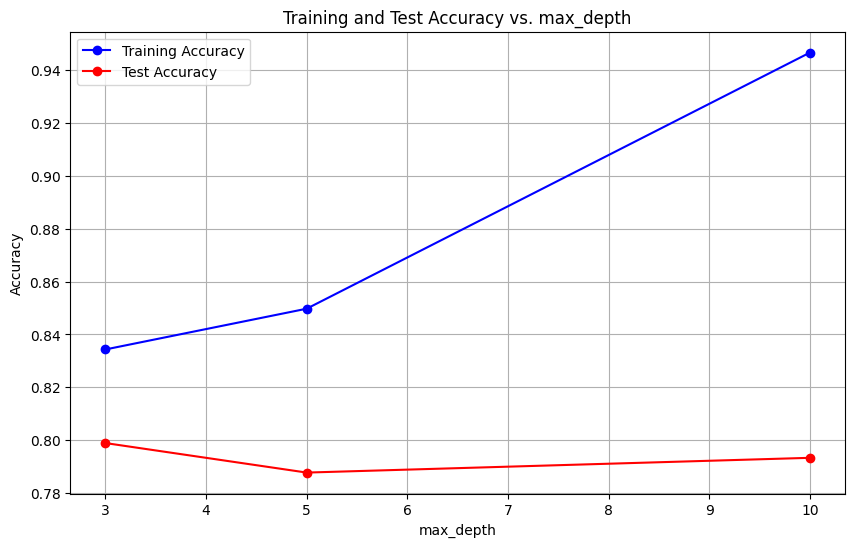

In [ ]:
import matplotlib.pyplot as plt

# Training and test accuracies for different max_depth values
depth_values = [3, 5, 10, None]  # Define the depth values
train_accuracies = [0.83429666292314383, 0.8497191011235955, 0.9466292134831461, 1.0]  # Training accuracies
test_accuracies = [0.7988826815642458, 0.7877094972067039, 0.7932969839547499, 0.7653128349149621]  # Test accuracies

# Plotting the graph
plt.figure(figsize=(10,6))  # Set the figure size
plt.plot(depth_values, train_accuracies, label='Training Accuracy', marker='o', linestyle='-', color='blue')  # Plot training accuracy
plt.plot(depth_values, test_accuracies, label='Test Accuracy', marker='o', linestyle='-', color='red')  # Plot test accuracy

# Labeling the axes
plt.xlabel('max_depth')  # Label for the x-axis
plt.ylabel('Accuracy')  # Label for the y-axis

# Title of the graph
plt.title('Training and Test Accuracy vs. max_depth')  # Title of the plot

# Adding a legend to the plot
plt.legend()  # Display the legend

# Adding a grid to the plot for better readability
plt.grid(True)  # Show grid lines

# Display the plot
plt.show()  # Show the final plot


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Train the model with the given training data
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Get the cost complexity pruning path
path = model.cost_complexity_pruning_path(X_train, y_train)

# Extract the alpha values (complexity parameter) from the path
alpha_ccp_values = path.ccp_alphas

# Print the alpha values
print("Alpha values for cost complexity pruning:")
print(alpha_ccp_values)


Alpha values for cost complexity pruning:
[0.         0.00088705 0.00090958 0.00092733 0.00107953 0.0011236
 0.00117041 0.00122893 0.00125324 0.00126404 0.00128236 0.00128745
 0.00130417 0.00131671 0.00133761 0.00137696 0.00139833 0.00140449
 0.00141343 0.00165235 0.00168539 0.0017005  0.00173759 0.00178258
 0.00178754 0.00186751 0.00187266 0.00189607 0.00190147 0.00201877
 0.0020429  0.0020432  0.00210674 0.00211937 0.00234082 0.00234082
 0.00240592 0.00241226 0.00245787 0.00254875 0.00260737 0.0026121
 0.0027587  0.00326892 0.00343771 0.00364627 0.00558961 0.00862922
 0.01094867 0.01392951 0.01592416 0.03860535 0.13777998]


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Extract the positive alpha_ccp values (ignore zero values)
positive_alpha_ccp_values = path.ccp_alphas[path.ccp_alphas > 0]

# Initialize a dictionary to store the trained models for each alpha
trained_models = {}

# Train a decision tree for each positive alpha_ccp value
for alpha in positive_alpha_ccp_values:
    # Train the decision tree with the current alpha value for pruning
    model_pruned = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha)
    model_pruned.fit(X_train, y_train)  # Fit the model on the training data

    # Store the trained model in the dictionary
    trained_models[alpha] = model_pruned

# Print the number of models trained
print(f"Number of models trained: {len(trained_models)}")


Number of models trained: 51


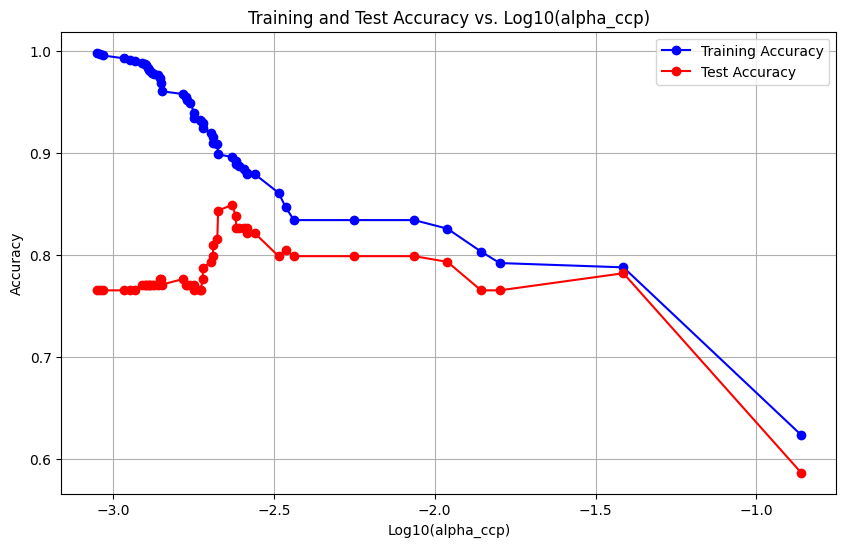

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score

# Lists to store the results
alpha_values = []
train_accuracies = []
test_accuracies = []

# Loop through each trained model and calculate accuracy
for alpha, model in trained_models.items():
    # Predict on training data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate accuracy for training and test data
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Append the results
    alpha_values.append(alpha)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Plotting the accuracy vs. alpha_ccp in logarithmic scale
plt.figure(figsize=(10,6))

# Plot the training and test accuracy
plt.plot(np.log10(alpha_values), train_accuracies, label='Training Accuracy', marker='o', linestyle='-', color='blue')
plt.plot(np.log10(alpha_values), test_accuracies, label='Test Accuracy', marker='o', linestyle='-', color='red')

# Adding labels and title
plt.xlabel('Log10(alpha_ccp)')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy vs. Log10(alpha_ccp)')
plt.legend()

# Display the plot
plt.grid(True)
plt.show()


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Train the complete tree model (max_depth=None)
model_full = DecisionTreeClassifier(random_state=42, max_depth=None)  # max_depth=None for the complete tree
model_full.fit(X_train, y_train)

# Store the complete tree model in trained_models
trained_models['full_tree'] = model_full  # Store the complete tree model

# Train the pruned model with selected alpha_ccp
model_pruned = DecisionTreeClassifier(random_state=42, ccp_alpha=selected_alpha)  # Using the selected alpha_ccp
model_pruned.fit(X_train, y_train)

# Store the pruned model in trained_models
trained_models[selected_alpha] = model_pruned  # Save the pruned model with selected alpha_ccp

# Print confirmation that both models have been trained and saved
print(f"Complete tree (max_depth=None) and pruned model (alpha_ccp={selected_alpha}) have been trained and saved.")




Complete tree (max_depth=None) and pruned model (alpha_ccp=0.0008870490833826143) have been trained and saved.


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Train the shallow tree model with max_depth=4
model_shallow = DecisionTreeClassifier(random_state=42, max_depth=4)  # Shallow tree with max_depth=4
model_shallow.fit(X_train, y_train)

# Get the number of nodes and depth for the shallow tree
num_nodes_shallow = model_shallow.tree_.node_count
depth_shallow = model_shallow.get_depth()

# Predict and calculate accuracy for the shallow model
y_train_pred_shallow = model_shallow.predict(X_train)
y_test_pred_shallow = model_shallow.predict(X_test)
train_accuracy_shallow = accuracy_score(y_train, y_train_pred_shallow)
test_accuracy_shallow = accuracy_score(y_test, y_test_pred_shallow)

# Print the results for the shallow model
print(f"Shallow Tree (max_depth=4):")
print(f"  Number of nodes: {num_nodes_shallow}")
print(f"  Depth of the tree: {depth_shallow}")
print(f"  Training Accuracy: {train_accuracy_shallow}")
print(f"  Test Accuracy: {test_accuracy_shallow}")
print("\n")

# Use the saved complete tree model (max_depth=None)
model_full = trained_models['full_tree']  # Access the complete tree model
# Get the number of nodes and depth for the complete tree
num_nodes_full = model_full.tree_.node_count
depth_full = model_full.get_depth()

# Predict and calculate accuracy for the complete tree model
y_train_pred_full = model_full.predict(X_train)
y_test_pred_full = model_full.predict(X_test)
train_accuracy_full = accuracy_score(y_train, y_train_pred_full)
test_accuracy_full = accuracy_score(y_test, y_test_pred_full)

# Print the results for the complete tree model
print(f"Complete Tree (max_depth=None):")
print(f"  Number of nodes: {num_nodes_full}")
print(f"  Depth of the tree: {depth_full}")
print(f"  Training Accuracy: {train_accuracy_full}")
print(f"  Test Accuracy: {test_accuracy_full}")
print("\n")

# Use the saved pruned model with selected alpha_ccp
model_pruned = trained_models[selected_alpha]  # Access the pruned model
# Get the number of nodes and depth for the pruned tree
num_nodes_pruned = model_pruned.tree_.node_count
depth_pruned = model_pruned.get_depth()

# Predict and calculate accuracy for the pruned model
y_train_pred_pruned = model_pruned.predict(X_train)
y_test_pred_pruned = model_pruned.predict(X_test)
train_accuracy_pruned = accuracy_score(y_train, y_train_pred_pruned)
test_accuracy_pruned = accuracy_score(y_test, y_test_pred_pruned)

# Print the results for the pruned model
print(f"Pruned Model (alpha_ccp={selected_alpha}):")
print(f"  Number of nodes: {num_nodes_pruned}")
print(f"  Depth of the tree: {depth_pruned}")
print(f"  Training Accuracy: {train_accuracy_pruned}")
print(f"  Test Accuracy: {test_accuracy_pruned}")


Shallow Tree (max_depth=4):
  Number of nodes: 29
  Depth of the tree: 4
  Training Accuracy: 0.8384831460674157
  Test Accuracy: 0.8044692737430168


Complete Tree (max_depth=None):
  Number of nodes: 277
  Depth of the tree: 16
  Training Accuracy: 1.0
  Test Accuracy: 0.7653631284916201


Pruned Model (alpha_ccp=0.0008870490833826143):
  Number of nodes: 271
  Depth of the tree: 16
  Training Accuracy: 0.9985955056179775
  Test Accuracy: 0.7653631284916201
